In [63]:
#################
##### Setup #####
#################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.metrics import r2_score
pd.options.display.max_columns = None

%matplotlib inline
os.chdir("C:/Users/peter/Desktop/kaggle/houses")

In [65]:
trn = pd.read_csv("train.csv")
tst = pd.read_csv("test.csv")

In [67]:
trn['log_sale_price'] = np.log(trn.SalePrice)
trn = trn.drop('SalePrice',axis = 1)

The variable LotFrontage has 259 NAs
The variable LotArea has 0 NAs
The variable OverallQual has 0 NAs
The variable YearBuilt has 0 NAs
The variable YearRemodAdd has 0 NAs
The variable MasVnrArea has 8 NAs
The variable BsmtFinSF1 has 0 NAs
The variable BsmtFinSF2 has 0 NAs
The variable BsmtUnfSF has 0 NAs
The variable TotalBsmtSF has 0 NAs
The variable FirstFlrSF has 0 NAs
The variable SecondFlrSF has 0 NAs
The variable LowQualFinSF has 0 NAs
The variable GrLivArea has 0 NAs
The variable BsmtFullBath has 0 NAs
The variable BsmtHalfBath has 0 NAs
The variable FullBath has 0 NAs
The variable HalfBath has 0 NAs
The variable BedroomAbvGr has 0 NAs
The variable KitchenAbvGr has 0 NAs
The variable TotRmsAbvGrd has 0 NAs

C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until



The variable Fireplaces has 0 NAs
The variable GarageYrBlt has 81 NAs
The variable GarageCars has 0 NAs
The variable GarageArea has 0 NAs
The variable WoodDeckSF has 0 NAs
The variable OpenPorchSF has 0 NAs
The variable EnclosedPorch has 0 NAs
The variable ScreenPorch has 0 NAs
The variable PoolArea has 0 NAs
The variable MiscVal has 0 NAs
The variable BedroomAbvGr has 0 NAs
The variable MoSold has 0 NAs


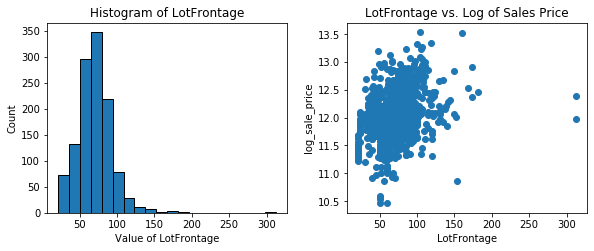

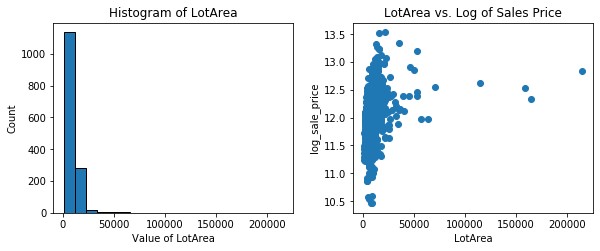

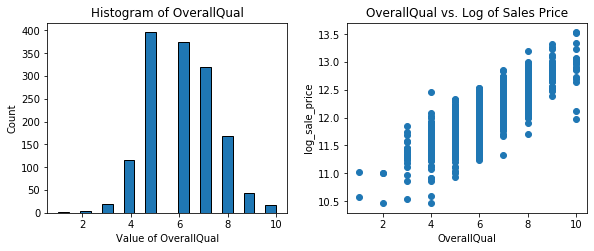

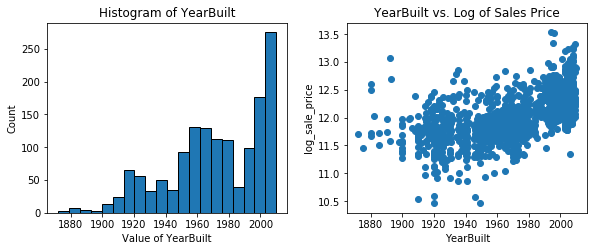

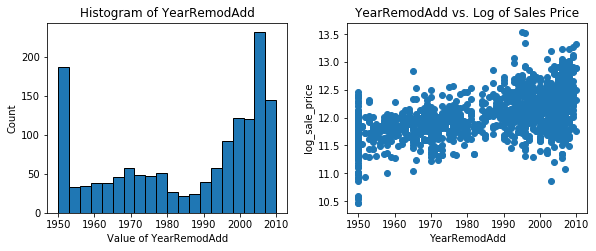

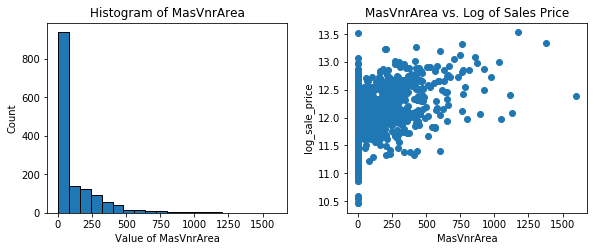

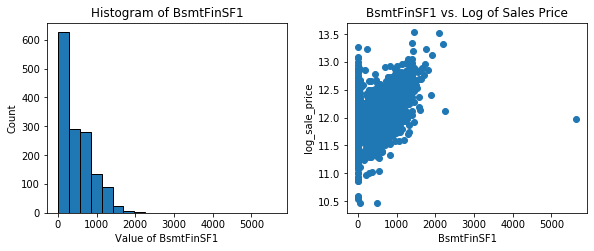

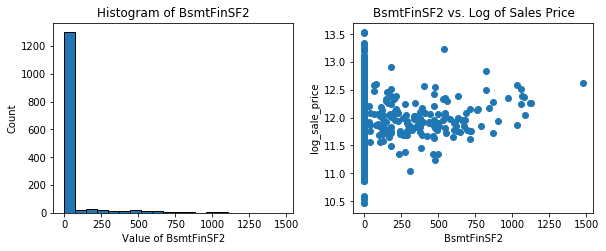

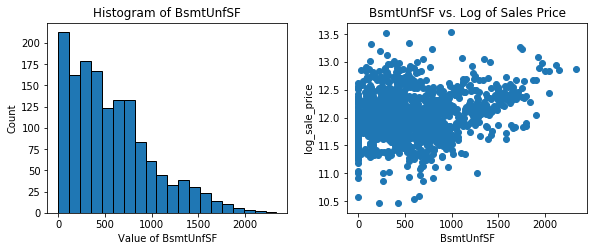

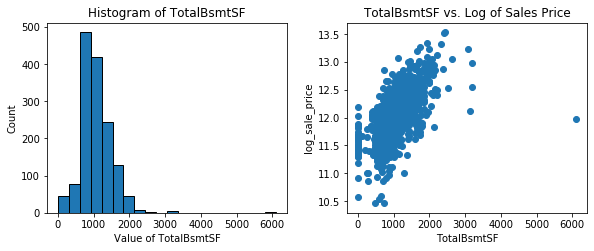

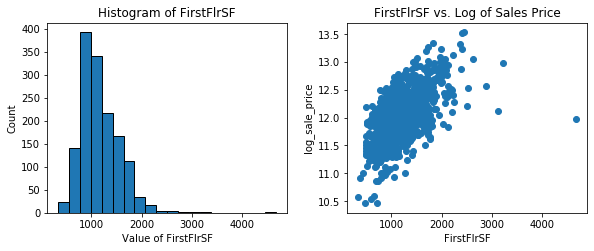

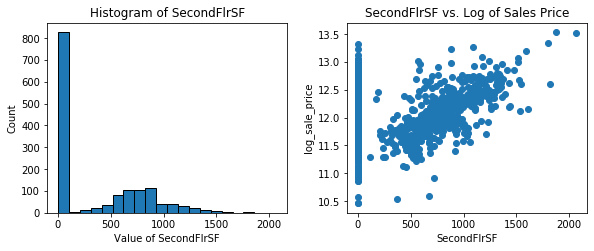

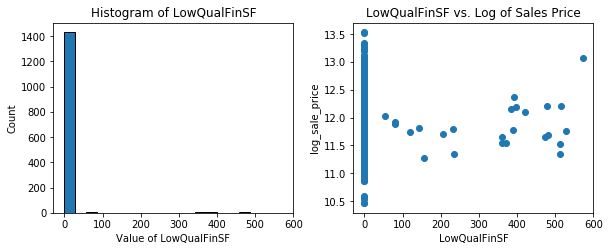

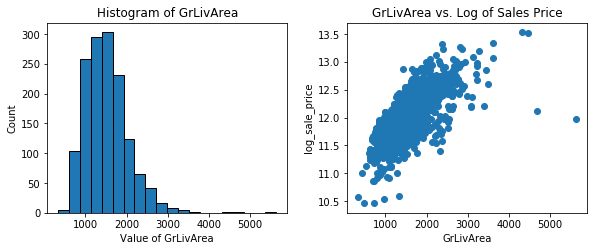

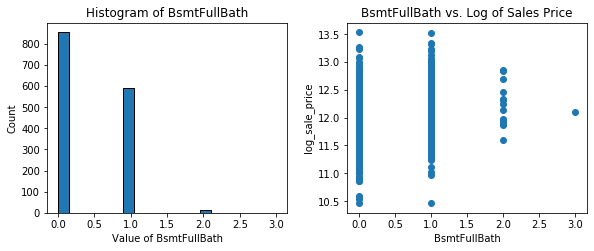

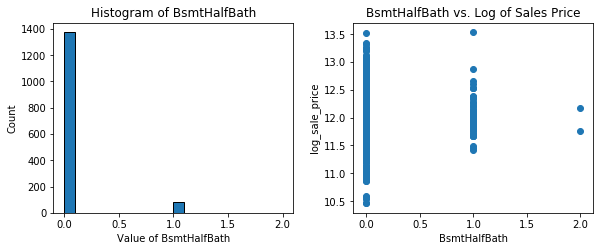

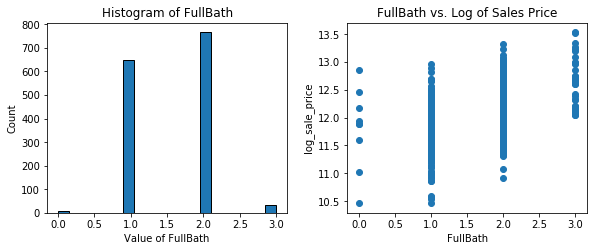

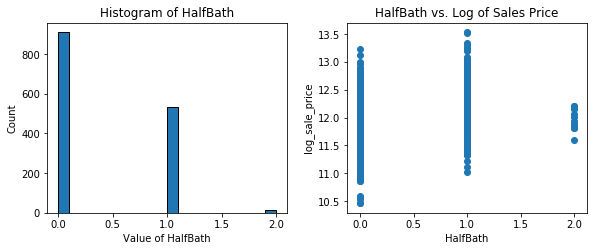

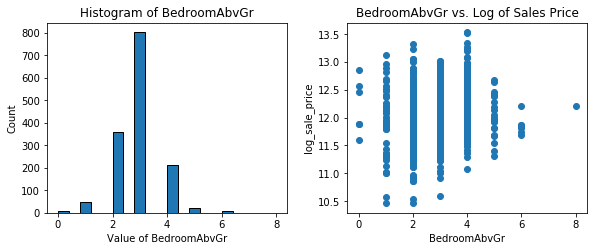

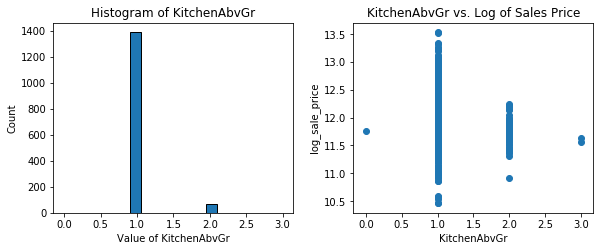

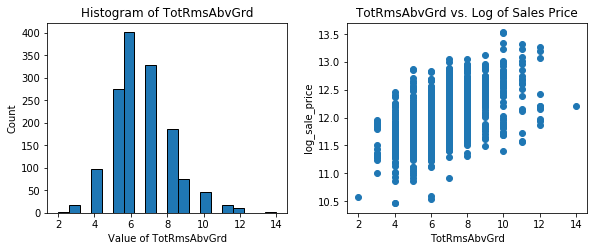

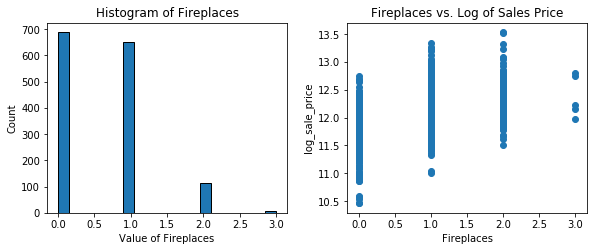

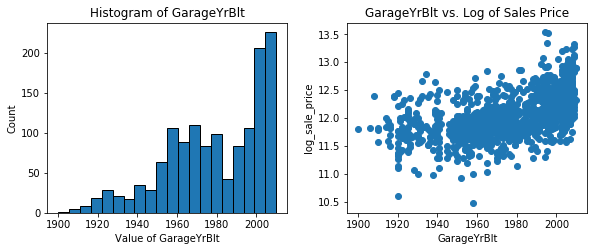

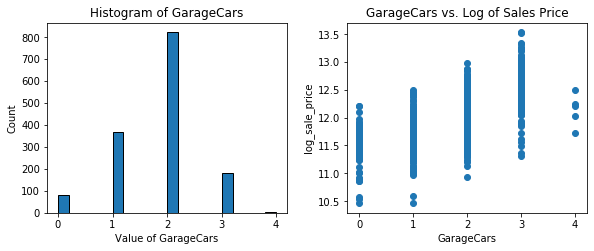

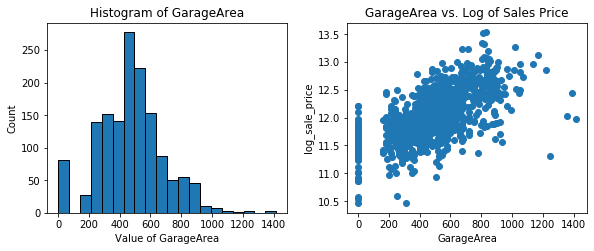

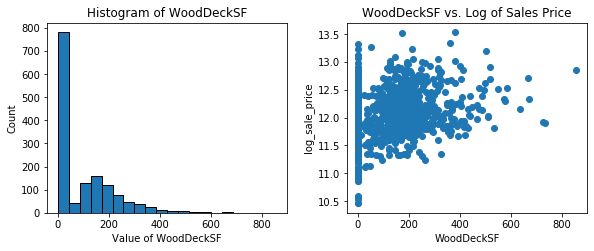

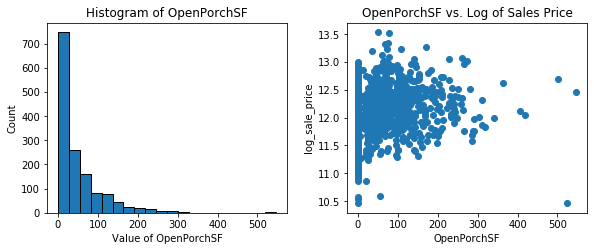

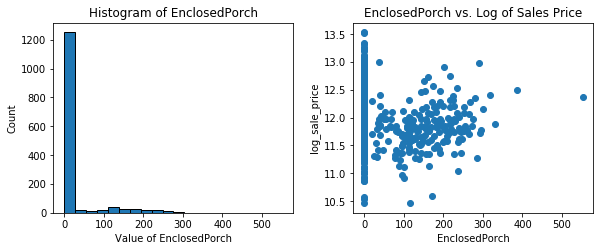

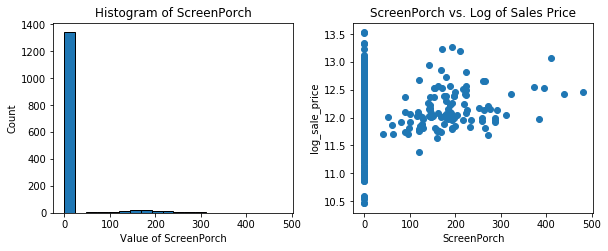

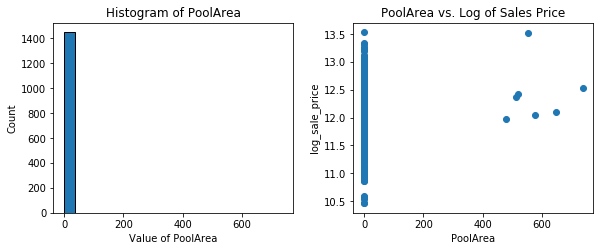

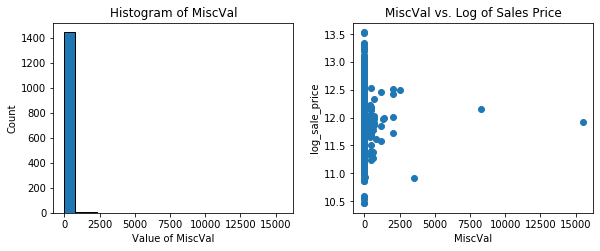

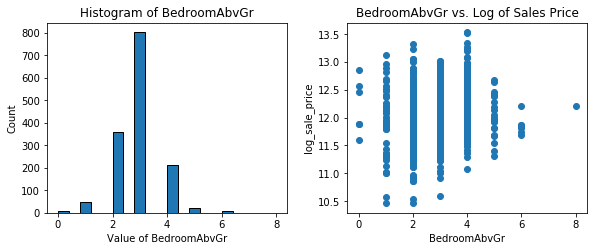

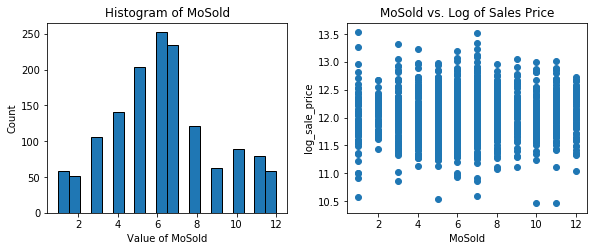

In [69]:
#Numeric Variable relationships with Log Sale Price

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = trn.copy().select_dtypes(include = numerics)
newdf.columns.values
newdf.rename(columns={'1stFlrSF' : 'FirstFlrSF', '2ndFlrSF' : 'SecondFlrSF', '3SsnPorch': 'ThreeSsnPorch_zero'},inplace = True)

def plot_hist_and_bivariate(variable):
    fig,axs = plt.subplots(1,2)
    axs[0].hist(newdf[variable].dropna(),edgecolor = 'black',bins = 20)
    axs[0].set_title('Histogram of ' + variable)
    axs[0].set_ylabel('Count')
    axs[0].set_xlabel('Value of ' + variable)
    axs[1].scatter(newdf[variable],y = newdf.log_sale_price)
    axs[1].set_xlabel(variable)
    axs[1].set_ylabel("log_sale_price")
    axs[1].set_title(variable + ' vs. Log of Sales Price')
    plt.subplots_adjust(bottom=0, left = 0,right=1.25, top=0.66,wspace = 0.25 )
    
    number_missing = pd.isnull(newdf[variable]).value_counts()[0]
    print("The variable " + variable + " has " + str(newdf.shape[0]-number_missing) + " NAs")

    
    
plot_hist_and_bivariate('LotFrontage')
plot_hist_and_bivariate('LotArea')
plot_hist_and_bivariate('OverallQual')
plot_hist_and_bivariate('YearBuilt')
plot_hist_and_bivariate('YearRemodAdd')
plot_hist_and_bivariate('MasVnrArea')
plot_hist_and_bivariate('BsmtFinSF1')
plot_hist_and_bivariate('BsmtFinSF2')
plot_hist_and_bivariate('BsmtUnfSF')
plot_hist_and_bivariate('TotalBsmtSF')
plot_hist_and_bivariate('FirstFlrSF')
plot_hist_and_bivariate('SecondFlrSF')
plot_hist_and_bivariate('LowQualFinSF')
plot_hist_and_bivariate('GrLivArea')
plot_hist_and_bivariate('BsmtFullBath')
plot_hist_and_bivariate('BsmtHalfBath')
plot_hist_and_bivariate('FullBath')
plot_hist_and_bivariate('HalfBath')
plot_hist_and_bivariate('BedroomAbvGr')
plot_hist_and_bivariate('KitchenAbvGr')
plot_hist_and_bivariate('TotRmsAbvGrd')
plot_hist_and_bivariate('Fireplaces')
plot_hist_and_bivariate('GarageYrBlt')
plot_hist_and_bivariate('GarageCars')
plot_hist_and_bivariate('GarageArea')
plot_hist_and_bivariate('WoodDeckSF')
plot_hist_and_bivariate('OpenPorchSF')
plot_hist_and_bivariate('EnclosedPorch')
plot_hist_and_bivariate('ScreenPorch')
plot_hist_and_bivariate('PoolArea')
plot_hist_and_bivariate('MiscVal')
plot_hist_and_bivariate('BedroomAbvGr')
plot_hist_and_bivariate('MoSold')



In [121]:
#Averages of Categorical Variables by Log Sale Price
def average_by_lsp(variable):
    grp = trn.fillna(-1).groupby(variable, sort = False).log_sale_price.agg(['mean','std','count'])
    print(grp.sort_values(by = 'mean'))

average_by_lsp('HeatingQC')
average_by_lsp('Functional')
average_by_lsp('BsmtQual')
average_by_lsp('BsmtCond')
average_by_lsp('BsmtExposure')
average_by_lsp('BsmtFinType1')
average_by_lsp('BsmtFinType2')
average_by_lsp('BsmtFullBath')
average_by_lsp('BsmtHalfBath')
average_by_lsp('FullBath')
average_by_lsp('HalfBath')
average_by_lsp('Exterior1st')
average_by_lsp('Exterior2nd')
average_by_lsp('HouseStyle')
average_by_lsp('MSZoning')
average_by_lsp('MasVnrType')
average_by_lsp('LotShape')
average_by_lsp('BldgType')
average_by_lsp('MSSubClass')
average_by_lsp('LandContour')
average_by_lsp('LotConfig')
average_by_lsp('GarageCars')
average_by_lsp('CentralAir')
average_by_lsp('Electrical')
average_by_lsp('MoSold')
average_by_lsp('RoofStyle')
average_by_lsp('MiscFeature')
average_by_lsp('SaleCondition')
average_by_lsp('FireplaceQu')
average_by_lsp('Fence')
average_by_lsp('GarageFinish')



                mean       std  count
HeatingQC                            
Po         11.373663       NaN      1
Fa         11.637034  0.447946     49
TA         11.811791  0.311851    426
Gd         11.907781  0.324061    240
Ex         12.207603  0.368953    737
                 mean       std  count
Functional                            
Maj2        11.316555  0.335494      5
Sev         11.767568       NaN      1
Min2        11.845498  0.257798     34
Mod         11.858672  0.592621     15
Maj1        11.859618  0.442316     14
Min1        11.862167  0.256587     31
Typ         12.036617  0.397603   1353
               mean       std  count
BsmtQual                            
-1        11.529680  0.287846     37
Fa        11.617600  0.289618     35
TA        11.810037  0.299063    648
Gd        12.177176  0.281599    614
Ex        12.650235  0.337087    119
               mean       std  count
BsmtCond                            
Po        11.065539  0.066340      2
-1        11.

In [188]:
#### Feature Engineering and Transformation ####

def dataprep_and_feature_engineer(indata,depvar_present):
    #impute NaN with mean and create a missing indicator
        
    def one_hot_encode_with_na(dataset,variable,pref):
        dataset.loc[pd.isnull(dataset[variable])==True,variable] = "NA"
        temp = pd.get_dummies(dataset[variable],prefix = pref,drop_first = True)
        return(temp)
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = indata.copy().select_dtypes(include=numerics)
    newdf = newdf.drop(['Id','MoSold','MSSubClass'],axis = 1)
        
    indata['MiscFeature_shed'] = np.where(indata['MiscFeature']=='Shed',1,0)
    newdf['MiscFeature_shed']= indata.MiscFeature_shed
    
    newdf=newdf.assign(YearRemodAdd_pre1950= 0)
    newdf.loc[newdf.YearRemodAdd==1950,'YearRemodAdd_pre1950'] = 1
    newdf=newdf.assign(Year_between_build_and_remod = newdf.YearRemodAdd - newdf.YearBuilt)
    newdf=newdf.drop(['YearRemodAdd'], axis = 1) 
    
    # make missing dummy and impute with mean
    newdf['LotFrontage_miss'] = pd.isnull(newdf.LotFrontage)
    newdf.LotFrontage = newdf.LotFrontage.fillna(newdf.LotFrontage.mean())

    # make missing dummy and fill with 0 (there is no garage)
    newdf['GarageYrBlt_miss'] = pd.isnull(newdf.GarageYrBlt)
    newdf.GarageYrBlt = newdf.GarageYrBlt.fillna(0)

    #Fill missing with the mode
    newdf.GarageCars = newdf.GarageCars.fillna(int(newdf.GarageCars.mode()))

    #Fill missing with the mean of the GarageCars == 2 rows
    newdf['GarageArea_miss'] = pd.isnull(newdf.GarageArea)
    newdf.GarageArea = newdf.GarageArea.fillna(newdf.loc[newdf.GarageCars==int(newdf.GarageCars.mode()),'GarageArea'].mean())

    #impute missing with the mean of stone veneers (closest in terms of bivariates)
    newdf = newdf.assign(MasVnrArea_zero = 0)
    newdf.loc[newdf.MasVnrArea == 0, 'MasVnrArea_zero'] = 1
    newdf.MasVnrArea = newdf.MasVnrArea.fillna(indata.loc[indata.MasVnrType=="Stone",'MasVnrArea'].mean()) #there are not enough nas to have a missing dummy
    
    #Dummy for BsmtFullBath and BsmtHalfBath >0, leave baths alone otherwise
    newdf.BsmtFullBath = newdf.BsmtFullBath.fillna(0) #two missing in tst, no need for dummy
    newdf.BsmtHalfBath = newdf.BsmtHalfBath.fillna(0) #two missing in tst, no need for dummy
    newdf.BsmtUnfSF = newdf.BsmtUnfSF.fillna(newdf.BsmtUnfSF.mean()) #one missing in tst, no need for dummy
    newdf.TotalBsmtSF = newdf.TotalBsmtSF.fillna(newdf.TotalBsmtSF.mean()) #one missing in tst, no need for dummy
    
    newdf['BsmtFinSF1_zero'] = np.where(newdf['BsmtFinSF1']==0,1,0)
    newdf.BsmtFinSF1 = newdf.BsmtFinSF1.fillna(newdf.BsmtFinSF1.mean()) #one missing in tst, no need for dummy
    newdf['BsmtFinSF2_zero'] = np.where(newdf['BsmtFinSF2']==0,1,0)
    newdf.BsmtFinSF2 = newdf.BsmtFinSF2.fillna(newdf.BsmtFinSF2.mean()) #one missing in tst, no need for dummy

    newdf.rename(columns={'1stFlrSF' : 'FirstFlrSF', '2ndFlrSF' : 'SecondFlrSF'},inplace = True)
    newdf['SecondFlrSF_zero'] = np.where(newdf['SecondFlrSF']==0,1,0)
    newdf['BsmtUnfSF_zero'] = np.where(newdf['BsmtUnfSF']==0,1,0)
    newdf['LowQualFinSF_zero'] = np.where(newdf['LowQualFinSF']>0,1,0)
    newdf = newdf.drop('LowQualFinSF',axis = 1)
    newdf['WoodDeckSF_zero'] = np.where(newdf['WoodDeckSF']>0,1,0)
    newdf['OpenPorchSF_zero'] = np.where(newdf['OpenPorchSF']>0,1,0)
    newdf['ScreenPorch_zero'] = np.where(newdf['ScreenPorch']>0,1,0)
    newdf['EnclosedPorch_zero'] = np.where(newdf['EnclosedPorch']>0,1,0)

    #Redo Variables to Dummy
    newdf.rename(columns= {'3SsnPorch': 'ThreeSsnPorch_zero','PoolArea':'PoolArea_zero','MiscVal':'MiscVal_zero'},inplace=True)
    newdf.loc[newdf.ThreeSsnPorch_zero>0,'ThreeSsnPorch_zero'] = 1
    newdf.loc[newdf.PoolArea_zero>0,'PoolArea_zero'] = 1
    newdf.loc[newdf.MiscVal_zero>0,'MiscVal_zero'] = 1
        
    indata = indata.assign(Functional_Numeric = 0)
    indata.loc[indata.Functional.isin(['Min1','Min2','Maj1','Mod']),'Functional_Numeric'] = 1
    indata.loc[indata.Functional.isin(['Sev','Maj2']),'Functional_Numeric'] = 2
    newdf['Functional_Numeric'] = indata.Functional_Numeric
    indata = indata.drop(['Functional_Numeric'],1)
    
    #########################################################
    #Transforming Square Footages into Logs
    newdf['LotArea'] = np.log1p(newdf['LotArea'])
    newdf['LotFrontage'] = np.log1p(newdf['LotFrontage'])
    newdf['OpenPorchSF'] = np.log1p(newdf['OpenPorchSF'])
    newdf['WoodDeckSF'] = np.log1p(newdf['WoodDeckSF'])
    newdf['BsmtUnfSF'] = np.log1p(newdf['BsmtUnfSF'])
    newdf['BsmtFinSF1'] = np.log1p(newdf['BsmtFinSF1'])
    newdf['BsmtFinSF2'] = np.log1p(newdf['BsmtFinSF2'])
    newdf['TotalBsmtSF'] = np.log1p(newdf['TotalBsmtSF'])
    newdf['ScreenPorch'] = np.log1p(newdf['ScreenPorch'])
    newdf['GarageArea'] = np.log1p(newdf['GarageArea'])
    newdf['FirstFlrSF'] = np.log1p(newdf['FirstFlrSF'])
    newdf['SecondFlrSF'] = np.log1p(newdf['SecondFlrSF'])
    newdf['GrLivArea'] = np.log1p(newdf['GrLivArea'])
    newdf['MasVnrArea'] = np.log1p(newdf['MasVnrArea'])

    newdf.rename(columns= {'LotArea': 'LotArea_log','LotFrontage':'LotFrontage_log','OpenPorchSF':'OpenPorchSF_log',
                          'WoodDeckSF': 'WoodDeckSF_log','BsmtUnfSF':'BsmtUnfSF_log','BsmtFinSF1':'BsmtFinSF1_log',
                          'BsmtFinSF2': 'BsmtFinSF2_log','TotalBsmtSF':'TotalBsmtSF_log','ScreenPorch':'ScreenPorch_log',
                          'GarageArea': 'GarageArea_log','FirstFlrSF': 'FirstFlrSF_log','SecondFlrSF': 'SecondFlrSF_log',
                          'GrLivArea' : 'GrLivArea_log','MasVnrArea': 'MasVnrArea_log'},inplace=True)

    
    newdf['BsmtFinSF1_log_squ'] = newdf.BsmtFinSF1_log*newdf.BsmtFinSF1_log
    newdf['ScreenPorch_log_squ'] =newdf.ScreenPorch_log*newdf.ScreenPorch_log
    newdf['YearBuilt_squ'] = newdf.YearBuilt*newdf.YearBuilt
    newdf['GarageYrBlt_squ'] = newdf.GarageYrBlt*newdf.GarageYrBlt
    newdf['OpenPorchSF_log_squ'] = newdf.OpenPorchSF_log*newdf.OpenPorchSF_log
    newdf['BsmtUnfSF_log_squ'] = newdf.BsmtUnfSF_log*newdf.BsmtUnfSF_log
    newdf['GrLivArea_log_squ'] = newdf.GrLivArea_log*newdf.GrLivArea_log
    newdf['OverallCond_squ'] = newdf.OverallCond*newdf.OverallCond
    newdf['OverallQual_squ'] = newdf.OverallQual*newdf.OverallQual
    newdf['LotArea_log_squ'] = newdf.LotArea_log*newdf.LotArea_log
    newdf['GarageArea_log_squ'] = newdf.GarageArea_log*newdf.GarageArea_log
    newdf['FirstFlrSF_log_squ'] = newdf.FirstFlrSF_log*newdf.FirstFlrSF_log
    newdf['SecondFlrSF_log_squ'] = newdf.SecondFlrSF_log*newdf.SecondFlrSF_log

    ###################################################################################
    #Convert Quality/Condition Metrics to Numeric
    def convert_QC_to_Numeric(dat,OldVar):
        dat = dat.assign(dummyvar = 0)
        dat.rename(columns={'dummyvar' : str(OldVar+"_Numeric")},inplace = True)
        dat.loc[dat[OldVar]=="Po",str(OldVar+"_Numeric")] = 1
        dat.loc[dat[OldVar]=="Fa",str(OldVar+"_Numeric")] = 2
        dat.loc[dat[OldVar]=="TA",str(OldVar+"_Numeric")] = 3
        dat.loc[dat[OldVar]=="Gd",str(OldVar+"_Numeric")] = 4
        dat.loc[dat[OldVar]=="Ex",str(OldVar+"_Numeric")] = 5
        return(dat[str(OldVar+"_Numeric")])
    
    newdf['BsmtQual_Numeric'] = convert_QC_to_Numeric(indata,'BsmtQual')
    newdf['BsmtCond_Numeric'] = convert_QC_to_Numeric(indata,'BsmtCond')
    newdf['BsmtExposure_Numeric'] = convert_QC_to_Numeric(indata,'BsmtExposure')
    newdf['HeatingQC_Numeric'] = convert_QC_to_Numeric(indata,'HeatingQC')
    newdf['GarageQual_Numeric'] = convert_QC_to_Numeric(indata,'GarageQual')
    newdf['GarageCond_Numeric'] = convert_QC_to_Numeric(indata,'GarageCond')
    newdf['KitchenQual_Numeric'] = convert_QC_to_Numeric(indata,'KitchenQual')
    newdf['FireplaceQu_Numeric'] = convert_QC_to_Numeric(indata,'FireplaceQu')
    newdf['ExterQual_Numeric'] = convert_QC_to_Numeric(indata,'ExterQual')
    newdf['ExterCond_Numeric'] = convert_QC_to_Numeric(indata,'ExterCond')
    
    

    ###################################################################################

    indata = indata.assign(Neighborhood_Numeric = 0)
    indata.loc[indata.Neighborhood.isin(['Blueste'])==True,'Neighborhood_Numeric'] = 0
    indata.loc[indata.Neighborhood.isin(['BrDale'])==True,'Neighborhood_Numeric'] = 0
    indata.loc[indata.Neighborhood.isin(['MeadowV'])==True,'Neighborhood_Numeric'] = 0
    indata.loc[indata.Neighborhood.isin(['NPkVill'])==True,'Neighborhood_Numeric'] = 0
    indata.loc[indata.Neighborhood.isin(['BrkSide'])==True,'Neighborhood_Numeric'] = 0
    indata.loc[indata.Neighborhood.isin(['Somerst'])==True,'Neighborhood_Numeric'] = 1
    indata.loc[indata.Neighborhood.isin(['IDOTRR'])==True,'Neighborhood_Numeric'] = 1
    indata.loc[indata.Neighborhood.isin(['SWISU'])==True,'Neighborhood_Numeric'] = 1
    indata.loc[indata.Neighborhood.isin(['OldTown'])==True,'Neighborhood_Numeric'] = 1
    indata.loc[indata.Neighborhood.isin(['CollgCr'])==True,'Neighborhood_Numeric'] = 2
    indata.loc[indata.Neighborhood.isin(['SawyerW'])==True,'Neighborhood_Numeric'] = 2
    indata.loc[indata.Neighborhood.isin(['NAmes'])==True,'Neighborhood_Numeric'] = 2
    indata.loc[indata.Neighborhood.isin(['Edwards'])==True,'Neighborhood_Numeric'] = 2
    indata.loc[indata.Neighborhood.isin(['Sawyer'])==True,'Neighborhood_Numeric'] = 3
    indata.loc[indata.Neighborhood.isin(['StoneBr'])==True,'Neighborhood_Numeric'] = 3
    indata.loc[indata.Neighborhood.isin(['NridgHt'])==True,'Neighborhood_Numeric'] = 3
    indata.loc[indata.Neighborhood.isin(['Gilbert'])==True,'Neighborhood_Numeric'] = 4
    indata.loc[indata.Neighborhood.isin(['Mitchel'])==True,'Neighborhood_Numeric'] = 4
    indata.loc[indata.Neighborhood.isin(['Crawfor'])==True,'Neighborhood_Numeric'] = 4
    indata.loc[indata.Neighborhood.isin(['NWAmes'])==True,'Neighborhood_Numeric'] = 4
    indata.loc[indata.Neighborhood.isin(['NoRidge'])==True,'Neighborhood_Numeric'] = 5
    indata.loc[indata.Neighborhood.isin(['Timber'])==True,'Neighborhood_Numeric'] = 5
    indata.loc[indata.Neighborhood.isin(['Veenker'])==True,'Neighborhood_Numeric'] = 5
    indata.loc[indata.Neighborhood.isin(['ClearCr'])==True,'Neighborhood_Numeric'] = 5
    neigh = one_hot_encode_with_na(indata,'Neighborhood',"neigh")
    
    ########################################
    ####One Hot Encode categorical variables
    ########################################
    
    indata.loc[pd.isnull(indata['MSZoning'])==True,'MSZoning'] = "RL"
    indata.loc[indata['MSZoning'].isin(['C (all)', 'RH']),'MSZoning'] = "RH"
    zone = one_hot_encode_with_na(indata,"MSZoning","zone")

    indata.loc[indata.MSSubClass==75,'MSSubClass'] = 20
    indata.loc[indata.MSSubClass==40,'MSSubClass'] = 50
    indata.loc[indata.MSSubClass==180,'MSSubClass'] = 45
    bdg_class = one_hot_encode_with_na(indata,"MSSubClass",'bdg_class')
    
    indata.loc[indata.HouseStyle.isin(['SFoyer','2.5Unf','1.5Unf']) == True,'HouseStyle']= 'Other'
    indata.loc[indata.HouseStyle.isin(['2.5Fin']) == True,'HouseStyle']= '2Story'
    style = one_hot_encode_with_na(indata,"HouseStyle","style")

    indata.loc[indata.Exterior1st.isin(['AsphShn'])==True,'Exterior1st'] = 'AsbShng'
    indata.loc[indata.Exterior1st.isin(['BrkComm'])==True,'Exterior1st'] = 'AsbShng'
    indata.loc[indata.Exterior1st.isin(['CBlock'])==True,'Exterior1st'] = 'AsbShng'
    indata.loc[indata.Exterior1st.isin(['WdShing'])==True,'Exterior1st'] = 'Wd Sdng'
    indata.loc[indata.Exterior1st.isin(['ImStucc'])==True,'Exterior1st'] = 'VinylSd'
    indata.loc[indata.Exterior1st.isin(['Stone'])==True,'Exterior1st'] = 'VinylSd'
    indata.loc[pd.isnull(indata['Exterior1st'])==True,'Exterior1st'] = "VinylSd"
    ext1 = one_hot_encode_with_na(indata,"Exterior1st","ext1")
    
    indata.loc[indata.Exterior2nd.isin(['AsphShn'])==True,'Exterior2nd'] = 'AsbShng'
    indata.loc[indata.Exterior2nd.isin(['Brk Cmn'])==True,'Exterior2nd'] = 'AsbShng'
    indata.loc[indata.Exterior2nd.isin(['CBlock'])==True,'Exterior2nd'] = 'AsbShng'
    indata.loc[indata.Exterior2nd.isin(['CmentBd'])==True,'Exterior2nd'] = 'CemntBd'
    indata.loc[indata.Exterior2nd.isin(['ImStucc'])==True,'Exterior2nd'] = 'VinylSd'
    indata.loc[indata.Exterior2nd.isin(['Other'])==True,'Exterior2nd'] = 'VinylSd'
    indata.loc[indata.Exterior2nd.isin(['Stone'])==True,'Exterior2nd'] = 'MetalSd'
    indata.loc[pd.isnull(indata['Exterior2nd'])==True,'Exterior2nd'] = "VinylSd"
    ext2 = one_hot_encode_with_na(indata,"Exterior2nd","ext2")
    
    indata.loc[pd.isnull(indata['MasVnrType'])==True,'MasVnrType'] = "Stone" #rebin the missing to the same as stone (best in terms of similar ys)
    vnr = one_hot_encode_with_na(indata,'MasVnrType','vnr')
    
    indata.loc[indata.Foundation.isin(['Stone', 'Wood'])==True,'Foundation'] = 'CBlock'
    found = one_hot_encode_with_na(indata,'Foundation','found')

    indata.loc[indata.Electrical.isin(['FuseP','Mix'])==True,'Electrical'] = 'FuseF'
    indata.loc[indata.Electrical.isnull()==True,'Electrical'] = 'SBrkr'
    elec = one_hot_encode_with_na(indata,'Electrical','elec')
    
    indata.loc[pd.isnull(indata['SaleType'])==True,'SaleType'] = "WD"
    salet = one_hot_encode_with_na(indata,'SaleType','salet')
    
    indata.loc[indata.SaleCondition == 'Alloca'] = "Family"   ### trying to reduce overfit
    indata.loc[indata.SaleCondition == 'AdjLand'] = "Abnorml" ### trying to reduce overfit
    salec = one_hot_encode_with_na(indata,'SaleCondition','salec')
    
    indata.loc[indata.MoSold.isin([1,2,3,4,5]),'MoSold'] = 1
    indata.loc[indata.MoSold.isin([6,7,8]),'MoSold'] = 2
    indata.loc[indata.MoSold.isin([9,10,11,12]),'MoSold'] = 3
    
    indata.loc[indata.RoofStyle.isin(['Gambrel','Mansard'])==True,'RoofStyle'] = 'Gable'
    indata.loc[indata.RoofStyle.isin(['Shed','Flat'])==True,'RoofStyle'] = 'Hip'
    roof= one_hot_encode_with_na(indata,'RoofStyle','roof')
    
    indata.loc[indata.LotConfig=='FR3','LotConfig'] = 'CulDSac'  ### trying to reduce overfit
    lcon = one_hot_encode_with_na(indata,'LotConfig','lcon')
        
    indata.loc[indata.LotConfig=='GLQ','BsmtFinType2'] = 'Unf'   #### trying to reduce overfit
    bsmtf2 = one_hot_encode_with_na(indata,'BsmtFinType2','bsmtf2')

    
    indata.loc[indata.Fence=='MnWw','Fence'] = 'GdWo'   #### trying to reduce overfit
    indata.loc[indata.Fence.isnull() == True,'Fence'] = 'A_miss'   #### trying to reduce overfit
    fence = one_hot_encode_with_na(indata,'Fence','fence')

    
    landc = one_hot_encode_with_na(indata,'LandContour','landc')
    bsmtf1 = one_hot_encode_with_na(indata,'BsmtFinType1','bsmtf1')
    garat = one_hot_encode_with_na(indata,'GarageType','garat')
    garaf = one_hot_encode_with_na(indata,'GarageFinish','garaf')
    pave = one_hot_encode_with_na(indata,'PavedDrive','pave')
    mosold = one_hot_encode_with_na(indata,'MoSold','mosold')
    lshape = one_hot_encode_with_na(indata,"LotShape","lshape")
    btype = one_hot_encode_with_na(indata,"BldgType","btype")
    cent = one_hot_encode_with_na(indata,'CentralAir','cent')

    ################ Scale Data #########################
    #if depvar_present == 'has_y_attached':
     #   temp_sale_price = newdf.log_sale_price
    #min_max_scaler = preprocessing.MinMaxScaler()
    #colnames = newdf.columns.values
    #newdf = min_max_scaler.fit_transform(newdf)
    #newdf = pd.DataFrame(min_max_scaler.fit_transform(newdf))
    #for i in range(0,len(colnames)):
    #    newdf = newdf.rename(columns={i: colnames[i]})
    #newdf.index = salet.index

    #heatqc,bsmtq, bsmtc, bsmte, kitch ,extc,extq, beds, garac,mosold
    data_prep_data = pd.concat([newdf,salet,salec,fence,pave,garaf,neigh,
                                garat,elec,cent,bsmtf1,lcon,landc,roof,
                                bsmtf2,found,vnr,ext2,mosold,
                                ext1,style,zone,lshape,btype], axis=1)
    #if depvar_present == 'has_y_attached':
    #    data_prep_data.log_sale_price = temp_sale_price
    #    print(1)
    return(data_prep_data)

In [189]:
###################
### Create Data ###
###################
print(trn.shape)
trn =  trn.loc[((trn.LotFrontage<200)  | (trn.LotFrontage.isnull() ==True)) & 
                (trn.LotArea<100000) & (trn.TotalBsmtSF<4000),:] 
trn= trn.loc[~trn.index.isin([523]),:]  #dropped due to high error in TRN, should find a better reason why though
print(trn.shape)

train_data = dataprep_and_feature_engineer(trn,'has_y_attached')
test_data = dataprep_and_feature_engineer(tst,'no_y_attached')
print(train_data.shape)


(1453, 82)
(1453, 82)
(1453, 209)


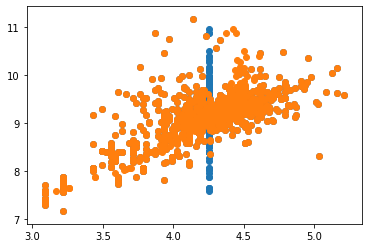

In [190]:
#######################################
#Work on Missing Values for LotFrontage
#######################################
plt.scatter(train_data.LotFrontage_log,train_data.LotArea_log)

import statsmodels.api as sm
train_data.FirstFlrSF_log
LotFullData = train_data.loc[train_data.LotFrontage_miss == 0,:]
LotFullData = LotFullData.assign(Intercept = 1)

lfront_X = LotFullData.loc[:,['Intercept','LotArea_log','LotArea_log_squ','FirstFlrSF_log','FirstFlrSF_log_squ']]
lfront_y = LotFullData.LotFrontage_log

ols = sm.OLS(lfront_y, lfront_X)
ols_fit = ols.fit()
#print(ols_result.summary())

LotMissData = train_data.loc[train_data.LotFrontage_miss==1,:]
LotMissData = LotMissData.assign(Intercept = 1)
lfront_X_pred = LotMissData.loc[:,['Intercept','LotArea_log','LotArea_log_squ','FirstFlrSF_log','FirstFlrSF_log_squ']]
preds_miss = ols_fit.predict(lfront_X_pred)
train_data.loc[train_data.LotFrontage_miss==1,'LotFrontage_log'] = preds_miss

plt.scatter(train_data.LotFrontage_log,train_data.LotArea_log)


LotMissData_tst = test_data.loc[test_data.LotFrontage_miss==1,:]
LotMissData_tst = LotMissData_tst.assign(Intercept = 1)
lfront_X_pred_tst = LotMissData_tst.loc[:,['Intercept','LotArea_log','LotArea_log_squ','FirstFlrSF_log','FirstFlrSF_log_squ']]
preds_miss_tst = ols_fit.predict(lfront_X_pred_tst)
test_data.loc[test_data.LotFrontage_miss==1,'LotFrontage_log'] = preds_miss_tst

In [191]:
#Run some final checks to make sure the entire dataset looks OK
print(train_data.isnull().all().sum()) #--> no NANs
print(test_data.isnull().all().sum()) #--> no NANs

y_var = train_data['log_sale_price']
X_vars = train_data.drop('log_sale_price', axis = 1)
X_trn,X_hld,y_trn,y_hld = train_test_split(X_vars,y_var,test_size = 0.2,random_state = 123123)


0
0


C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.870856653039172, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.854913117686309, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.306822683654065, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.545210047907669, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.137075116975716, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.390762037763234, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.026549333373718, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.284663028442776, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.300891290733066, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.100784376225502, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.631553127064313, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.108497013936056, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.888263970461937, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.366076631144722, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.210917345182307, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.176277656144226, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.008424367615476, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.624788435978259, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5493476087407245, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.861946854072706, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.844821400940536, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.291006426242997, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.21642881440493, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.659133566753108, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.964945105056744, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.415841712766715, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.007844755673181, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5150779157874235, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.116540230881949, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.397699902450234, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.964898631794549, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.225170319220307, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.240543307759123, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.51535204562357, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.519420967395272, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.090458659522526, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.019197462421992, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.555652440700756, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.029447453260778, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.770758544324507, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.204636569076193, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.980021688734599, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.327363652957511, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.928840194299349, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.585686921248985, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.9549642940744825, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.390490657710233, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.323825558443974, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.762018196005164, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.213557743073756, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.805795400736054, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.89443145858246, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.495682155423879, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.735240259640946, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.5559978938806305, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7932258773046605, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.793194058367415, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.261288186137641, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.27740840361751, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.798627164013158, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2480698786556825, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.77039833211539, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.250598161406664, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.170442504728433, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6334951913050775, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.510334464327025, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.155510004186143, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.986030666608711, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.604242011694737, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8977472602572885, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.555878616198946, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.264626365415789, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.9247452967140495, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.447536463095956, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.515016831497114, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.385709788050817, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.828939694940477, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.427762833486595, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.847783990744981, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.447200894266475, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6884981728199495, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5924558498090935, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8585112093611516, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.884700040987148, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1649100758650786, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1789481930220465, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.704727032657206, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.475826933670753, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.996379040122745, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.470499583714505, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.163722984645949, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.627242434260488, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.503465003864498, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.942002798563117, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.758079048733953, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3924967916586874, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.931369307910819, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.590431288139559, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.326067518468081, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.150033664402086, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.317884046531263, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.245315754865149, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.334665522819171, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.389495513591957, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.832664630759654, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.746645799081611, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.198135871940989, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.790356448636116, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0577902247482625, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.649331637476702, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.92333646342214, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0321030044871655, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.290004310059981, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.306293382507533, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.772390431071867, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.773606495895095, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.308892511600981, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.287912058933278, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.808794918260682, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.287978235560512, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.007677575763708, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.392737916430206, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.13067470374716, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.296260231676222, tolerance: 0.0015806297563537542
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.136708066416137, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7470577450212215, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.522513409065423, tolerance: 0.0016305182456526491
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.16586027047588, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.890725256464497, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.936166145809029, tolerance: 0.001610598935065511
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.479511991127604, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.420175212417966, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.431422616709023, tolerance: 0.00155662285981836
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.36803305748151, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.815447087096266, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.404047718932181, tolerance: 0.0016376023407598946
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.852137558911866, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.444345793863502, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.585431512358204, tolerance: 0.0016356495257214632
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.177913517593677, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.429904859307502, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.520886972129691, tolerance: 0.0015889043209672989
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.759495229722531, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7614384221979025, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.280452300120724, tolerance: 0.0016594414870783076
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.289503019155742, tolerance: 0.0016337803449468196
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.877175130477455, tolerance: 0.0015820277119229244
  positive)
C:\Users\peter\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=1234, selection='cyclic',
                                   tol=1e-05, warm_start=False),
                   iid='warn', n_iter=150, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018115E94C88>},
                   pre_dispatch='2*n_jobs', random_state=12312332, refit='MSE',
                   return_train_score=False,
                   scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'},
                   verbose=0)
0.0004931286949723204


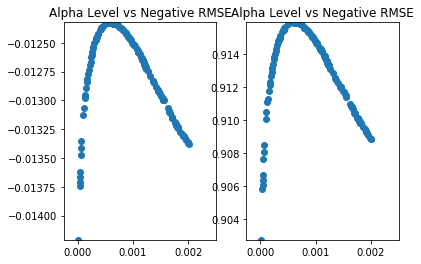

In [192]:
##############
#Lasso with CV
##############

scoring_metrics = {'MSE': 'neg_mean_squared_error', 'R2': 'r2'}
param_grid = {'alpha': uniform(0.00001,0.002)}
#n_iter is the number of parameter iterations tried out
lasso_cv = Lasso(random_state=1234, normalize = False, fit_intercept = True, tol = 0.00001, )
rsearch = RandomizedSearchCV(estimator = lasso_cv, 
                             cv = 10,
                             param_distributions = param_grid, 
                             scoring= scoring_metrics,
                             n_iter=150,
                             random_state= 12312332,
                             refit = 'MSE' )#this refits best estimator on whole data
rsearch.fit(X_trn,y_trn)

#Examine the results of the randomized search for Lasso
random_cv_results = pd.DataFrame(rsearch.cv_results_)
random_cv_results['Mean_MSE'] = (random_cv_results['split0_test_MSE']+random_cv_results['split1_test_MSE']+random_cv_results['split2_test_MSE']+random_cv_results['split3_test_MSE']+random_cv_results['split4_test_MSE'])/5
random_cv_results['Mean_rsq'] = (random_cv_results['split0_test_R2']+random_cv_results['split1_test_R2']+random_cv_results['split2_test_R2']+random_cv_results['split3_test_R2']+random_cv_results['split4_test_R2'])/5

fig,axs = plt.subplots(1,2)
axs[0].scatter(random_cv_results.param_alpha,random_cv_results.Mean_MSE)
axs[0].set_title('Alpha Level vs Negative RMSE')
axs[0].set_ylim(random_cv_results.Mean_MSE.min(),random_cv_results.Mean_MSE.max())
axs[0].set_xlim(-0.00025,0.0025)

axs[1].scatter(random_cv_results.param_alpha,random_cv_results.Mean_rsq)
axs[1].set_title('Alpha Level vs Negative RMSE')

axs[1].set_ylim(random_cv_results.Mean_rsq.min(),random_cv_results.Mean_rsq.max())
axs[1].set_xlim(-0.00025,0.0025)

best_param_alpha = rsearch.best_estimator_.alpha
print(rsearch)
print(rsearch.best_estimator_.alpha)

In [193]:
### Residual Plot Function ###

import seaborn as sns             # Seaborn for beautiful plots
import statsmodels
y = np.zeros(100)
x = np.linspace(0,10,num = 100)
def resid_func(dataset,varlist):
    lenlist = len(varlist)
    fig,axs = plt.subplots(1,lenlist)
    plt.subplots_adjust(right = 2)
    for idx,val in enumerate(varlist):         
        sns.regplot(val, 'residual', data=dataset,  color="grey", scatter_kws={"s": 10},
             line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs[idx])
        axs[idx].plot(x,y, color = 'black')
        axs[idx].set_ylim(-0.5,0.5)
        axs[idx].set_title(val)
        xlim1 = dataset[val].min() -float(dataset[val].min())*0.1
        xlim2 = dataset[val].max() + float(dataset[val].max())*0.1
        axs[idx].set_xlim(xlim1,xlim2)


C:\Users\peter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


mean trn error is 0.10234478616589444
mean hld error is 0.1136941022735293


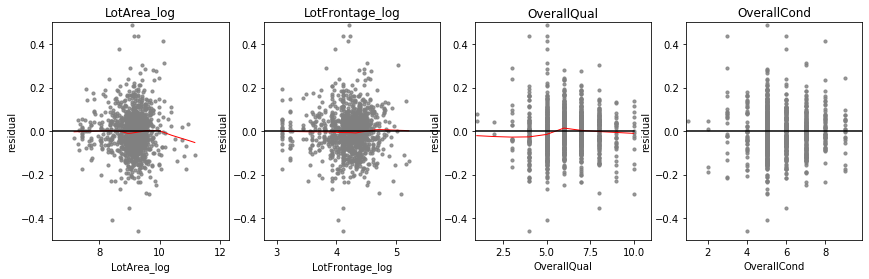

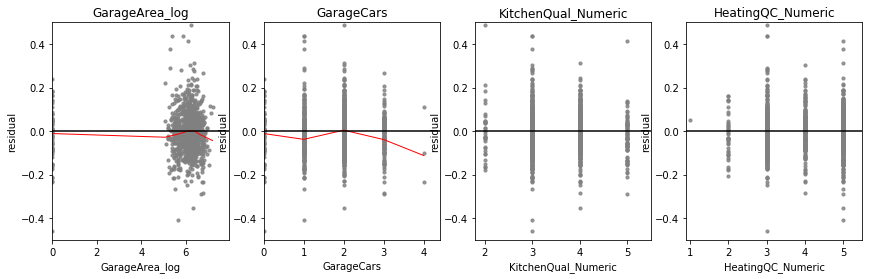

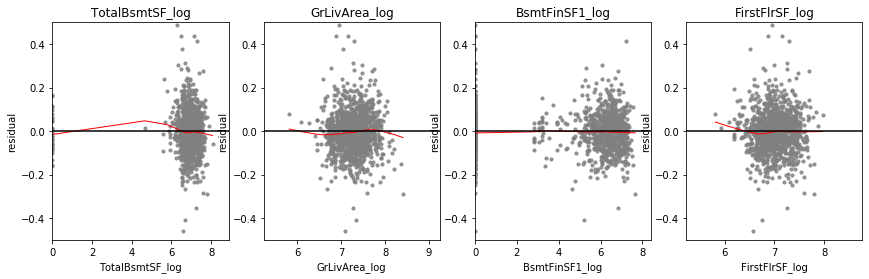

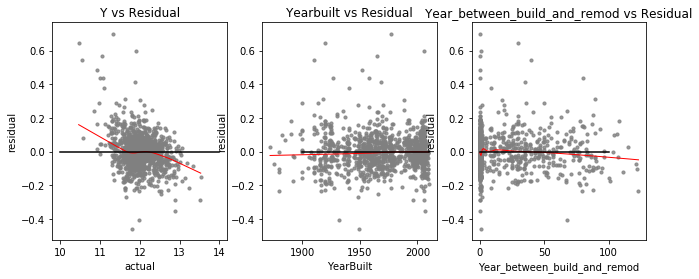

In [194]:
#Lasso Fit using best results of the RandomizedSearchCV
#Training Error
lasso_bestmdl_trn_pred = pd.Series(rsearch.predict(X_trn),index = y_trn.index)
error_trn_lasso = pd.concat([y_trn,lasso_bestmdl_trn_pred],axis = 1)
error_trn_lasso.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_trn_lasso=error_trn_lasso.assign(squ_error = ((error_trn_lasso.actual-error_trn_lasso.prediction)**2))
error_trn_lasso.head()

## Error Tracking
error_track_lasso = pd.concat([error_trn_lasso,X_trn],axis = 1)
error_track_lasso = error_track_lasso.sort_values('squ_error',ascending = False)
error_track_lasso['residual'] = error_track_lasso.prediction-error_track_lasso.actual
resid_func(error_track_lasso,['LotArea_log','LotFrontage_log','OverallQual','OverallCond'])
resid_func(error_track_lasso,['GarageArea_log','GarageCars','KitchenQual_Numeric','HeatingQC_Numeric'])
resid_func(error_track_lasso,['TotalBsmtSF_log','GrLivArea_log','BsmtFinSF1_log','FirstFlrSF_log'])

fig,axs = plt.subplots(1,3)
sns.regplot('actual', 'residual', data=error_track_lasso,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs[0])
axs[0].plot(np.linspace(10,14,num = 100),np.zeros(100), color = 'black')
axs[0].set_title('Y vs Residual')

errortemp = error_track_lasso.loc[error_track_lasso.YearBuilt>0,:]
sns.regplot('YearBuilt', 'residual', data=errortemp,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs[1])
axs[1].plot(np.linspace(1900,2010,num = 110),np.zeros(110), color = 'black')
axs[1].set_title('Yearbuilt vs Residual')

sns.regplot('Year_between_build_and_remod', 'residual', data=errortemp,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs[2])
axs[2].plot(np.linspace(0,100,num = 100),np.zeros(100), color = 'black')
axs[2].set_title('Year_between_build_and_remod vs Residual')
plt.subplots_adjust(right = 1.5)

#Hold Error
lasso_bestmdl_hld_pred = pd.Series(rsearch.predict(X_hld),index = y_hld.index)
error_hld_lasso = pd.concat([y_hld,lasso_bestmdl_hld_pred],axis = 1)
error_hld_lasso.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_hld_lasso=error_hld_lasso.assign(squ_error = ((error_hld_lasso.actual-error_hld_lasso.prediction)**2))
error_hld_lasso.head()

print('mean trn error is ' + str(np.sqrt(error_trn_lasso.squ_error.mean())))
print('mean hld error is ' + str(np.sqrt(error_hld_lasso.squ_error.mean())))

#Lasso Coefficients
lasso_coef_values = pd.Series(rsearch.best_estimator_.coef_)
lasso_coef_names = pd.Series(X_trn.columns.values)
lasso_coef = pd.concat([lasso_coef_names,lasso_coef_values],axis = 1)
lasso_coef.rename(columns = {0: 'Variable',1:'Coef'},inplace = True)
lasso_coef.loc[lasso_coef.Coef > 0,:]

#Create test submission
lasso_tst_predict = np.exp(rsearch.best_estimator_.predict(test_data))
lasso_output = pd.DataFrame(pd.concat([tst.Id,pd.Series(lasso_tst_predict)],axis = 1))
lasso_output.rename(columns = {0:'SalePrice'},inplace=True)
lasso_output.to_csv('C:/Users/peter/Desktop/kaggle/houses/submission_py_lasso.csv',index= False)


In [224]:
lasso_coef.loc[lasso_coef.Coef > 0,:]


,Variable,Coef
3,OverallCond,0.049665
4,YearBuilt,0.003687
7,BsmtFinSF2_log,0.002355
9,TotalBsmtSF_log,0.009506
13,BsmtFullBath,0.024307
15,FullBath,0.011203
16,HalfBath,0.010297
19,TotRmsAbvGrd,0.000307
20,Fireplaces,0.001024
21,GarageYrBlt,0.000127


Text(0.5, 1.0, 'Yearbuilt vs Residual')

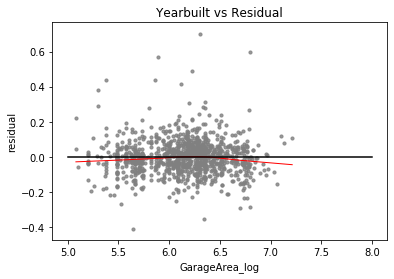

In [196]:
fig,axs = plt.subplots()
errortemp = error_track_lasso.loc[error_track_lasso.GarageArea_log>3,:]
sns.regplot('GarageArea_log', 'residual', data=errortemp,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs)
axs.plot(np.linspace(5,8,num = 5),np.zeros(5), color = 'black')
axs.set_title('Yearbuilt vs Residual')


In [38]:
# #######################
# #Random Forest with CV
# #######################
# #n_feat = X_trn.shape[1]
# n_feat = X_trn.shape[1]

# from sklearn.ensemble import RandomForestRegressor
# rf_cv = RandomForestRegressor(criterion = 'mse', random_state = 234, n_jobs = -1,oob_score = True)
# param_rf_search = {'n_estimators' : [100,300,1000],
#                    'max_depth' : randint(3,8),
#                    'min_samples_split' : randint(5,15), 
#                    'min_samples_leaf' : randint(3,10),
#                    'max_features' : ['sqrt',int(n_feat/2),n_feat]
#                   }
# random_search_rf = RandomizedSearchCV(rf_cv,
#                                      param_distributions = param_rf_search,
#                                      n_iter = 50,
#                                      cv = 5,
#                                      scoring = 'neg_mean_squared_error',
#                                      verbose = 2,
#                                      random_state = 2343,
#                                      refit = True)
# #varnames = lasso_coef.loc[abs(lasso_coef.Coef) > 0,'Variable']
# #X_trn_afterlasso = X_trn.loc[:,varnames]

# random_search_rf.fit(X_trn,y_trn)
# random_search_rf.best_estimator_

In [198]:
#######################
#Random Forest with CV
#######################
#n_feat = X_trn.shape[1]
n_feat = X_trn.shape[1]

rf_cv = RandomForestRegressor(criterion = 'mse', random_state = 234, n_jobs = -1,oob_score = True)
param_rf_search = {'n_estimators' : [1000],
                   'max_depth' : [7],
                   'min_samples_split' : [10], 
                   'min_samples_leaf' : [3],
                   'max_features' : [int(n_feat/2)]
                  }
random_search_rf = RandomizedSearchCV(rf_cv,
                                     param_distributions = param_rf_search,
                                     n_iter = 1,
                                     cv = 5,
                                     scoring = 'neg_mean_squared_error',
                                     verbose = 2,
                                     random_state = 2343,
                                     refit = True)
#varnames = lasso_coef.loc[abs(lasso_coef.Coef) > 0,'Variable']
#X_trn_afterlasso = X_trn.loc[:,varnames]

random_search_rf.fit(X_trn,y_trn)
random_search_rf.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7, total=   8.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7, total=   5.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7, total=   6.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7, total=   5.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=104, max_depth=7, total=   2.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features=104, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=True, random_state=234, verbose=0,
                      warm_start=False)

mean trn error is 0.09799068937819247


C:\Users\peter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


mean hld error is 0.14851162235003554


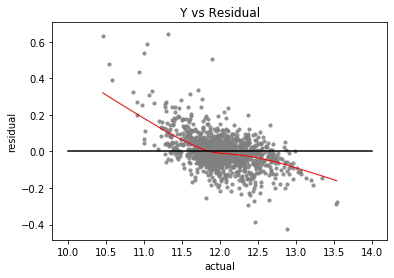

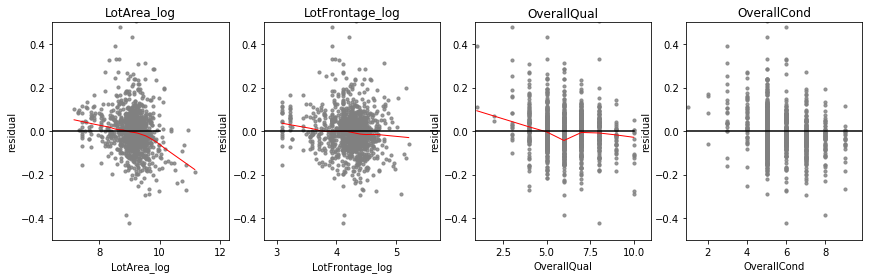

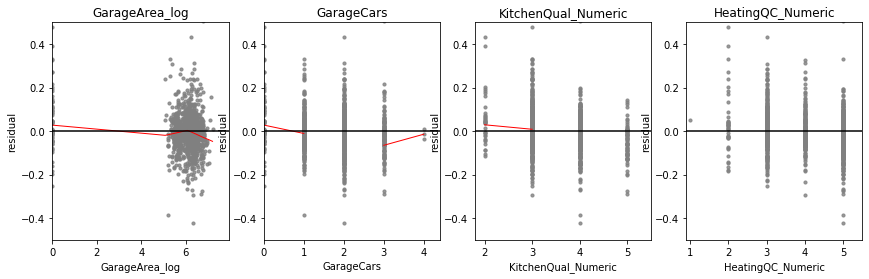

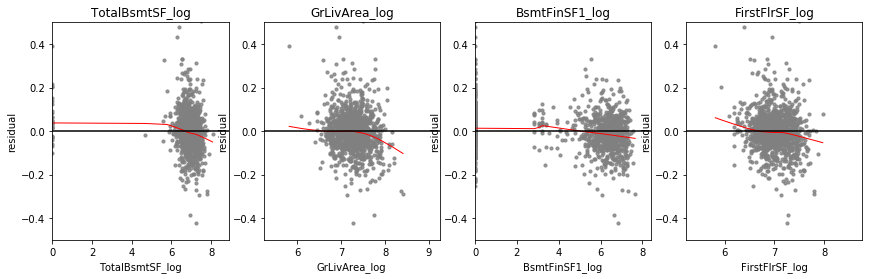

In [199]:
#Random Forest Fit using best results of the RandomizedSearchCV
#X_hld_afterlasso = X_hld.loc[:,varnames]

#Training Error
rf_bestmdl_trn_pred = pd.Series(random_search_rf.predict(X_trn),index = y_trn.index)
error_trn_rf = pd.concat([y_trn,rf_bestmdl_trn_pred],axis = 1)
error_trn_rf.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_trn_rf=error_trn_rf.assign(squ_error = ((error_trn_rf.actual-error_trn_rf.prediction)**2))
error_trn_rf.head()
print('mean trn error is ' + str(np.sqrt(error_trn_rf.squ_error.mean())))

## Error Tracking
error_track_rf = pd.concat([error_trn_rf,X_trn],axis = 1)
error_track_rf = error_track_rf.sort_values('squ_error',ascending = False)
error_track_rf['residual'] = error_track_rf.prediction-error_track_rf.actual

fig,axs = plt.subplots()
sns.regplot('actual', 'residual', data=error_track_rf,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs)
axs.plot(np.linspace(10,14,num = 100),np.zeros(100), color = 'black')
axs.set_title('Y vs Residual')

resid_func(error_track_rf,['LotArea_log','LotFrontage_log','OverallQual','OverallCond'])
resid_func(error_track_rf,['GarageArea_log','GarageCars','KitchenQual_Numeric','HeatingQC_Numeric'])
resid_func(error_track_rf,['TotalBsmtSF_log','GrLivArea_log','BsmtFinSF1_log','FirstFlrSF_log'])

#Hold Error
rf_bestmdl_hld_pred = pd.Series(random_search_rf.predict(X_hld),index = y_hld.index)
error_hld_rf = pd.concat([y_hld,rf_bestmdl_hld_pred],axis = 1)
error_hld_rf.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_hld_rf=error_hld_rf.assign(squ_error = ((error_hld_rf.actual-error_hld_rf.prediction)**2))
error_hld_rf.head()
print('mean hld error is ' + str(np.sqrt(error_hld_rf.squ_error.mean())))

#Create test submission
rf_tst_predict = np.exp(random_search_rf.best_estimator_.predict(test_data))
rf_output = pd.DataFrame(pd.concat([tst.Id,pd.Series(rf_tst_predict)],axis = 1))
rf_output.rename(columns = {0:'SalePrice'},inplace=True)
rf_output.to_csv('C:/Users/peter/Desktop/kaggle/houses/submission_py_rf.csv',index= False)


In [200]:
#######################
### XGBoost with CV ###
#######################

warnings.simplefilter(action='ignore', category=FutureWarning)
xgb_cv = XGBRegressor(n_estimators = 5000, objective= 'reg:squarederror',random_state = 1242321)
param_xgb_search = {'min_child_weight':randint(5,10),
                   'max_depth': randint(2,7),
                   'learning_rate': uniform(0.001,0.3),
                   'colsample_bylevel': uniform(0.75,0.24),
                   'colsample_bytree': uniform(0.75,0.24),
                    'reg_alpha': uniform(0.05,0.025)
                   }
fit_dict = {"eval_set":[(X_hld, y_hld)],
            "early_stopping_rounds":25,
            "eval_metric":"rmse",
           "verbose": 0}
random_search_xgb = RandomizedSearchCV(xgb_cv,
                                  param_distributions = param_xgb_search,
                                  n_iter = 150,
                                  cv = 10,
                                  scoring= 'neg_mean_squared_error',
                                  verbose = 0,
                                  random_state = 100,
                                  refit = True)
random_search_xgb.fit(X_trn,y_trn,eval_metric = "rmse",
                      eval_set = [(X_hld, y_hld)],
                      early_stopping_rounds = 25, verbose = 0)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=5000,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          r...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000181157006A0>,
                                        'min_child_weight': 

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.881581081791357, colsample_bynode=1,
             colsample_bytree=0.8747404098506897, gamma=0,
             importance_type='gain', learning_rate=0.08987023535972728,
             max_delta_step=0, max_depth=4, min_child_weight=9, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=1242321,
             reg_alpha=0.050966663003239175, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
mean trn error is 0.06411724438036212


C:\Users\peter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


mean hld error is 0.11859822137705031or xgboost package says 0.118598


,Id,SalePrice
0,1461,124273.000000
1,1462,167298.109375
2,1463,190725.640625
3,1464,193491.875000
4,1465,193717.312500


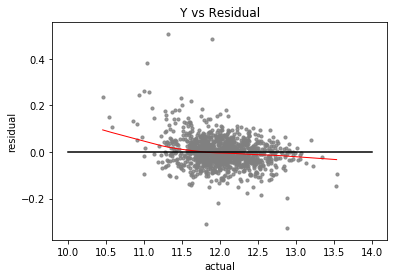

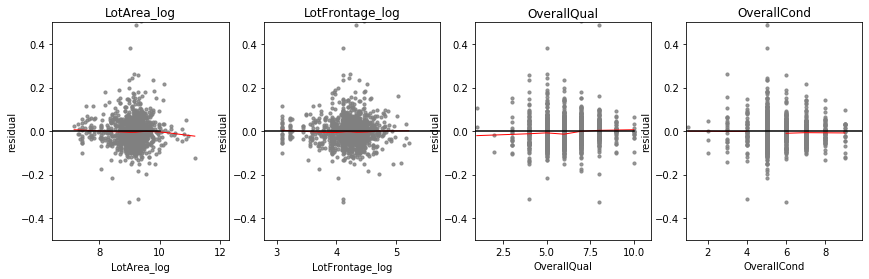

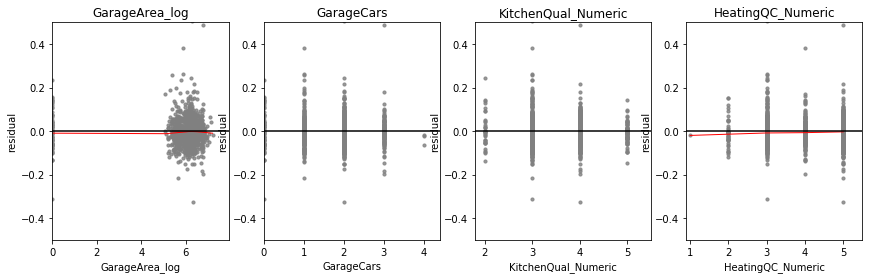

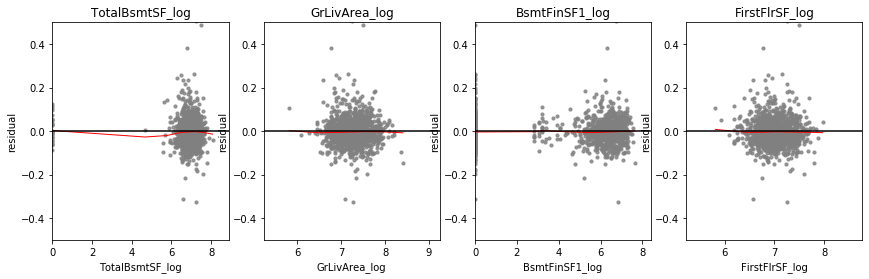

In [201]:
######################
# Model Performance  #
######################

print(random_search_xgb.best_estimator_)

#Training Error
xgb_bestmdl_trn_pred = pd.Series(random_search_xgb.predict(X_trn),index = y_trn.index)
error_trn_xgb = pd.concat([y_trn,xgb_bestmdl_trn_pred],axis = 1)
error_trn_xgb.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_trn_xgb=error_trn_xgb.assign(squ_error = ((error_trn_xgb.actual-error_trn_xgb.prediction)**2))
error_trn_xgb.head()
print('mean trn error is ' + str(np.sqrt(error_trn_xgb.squ_error.mean())))

## Error Tracking
error_track_xgb = pd.concat([error_trn_xgb,X_trn],axis = 1)
error_track_xgb = error_track_xgb.sort_values('squ_error',ascending = False)
error_track_xgb['residual'] = error_track_xgb.prediction-error_track_xgb.actual

fig,axs = plt.subplots()
sns.regplot('actual', 'residual', data=error_track_xgb,  color="grey", scatter_kws={"s": 10},
     line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True,ax=axs)
axs.plot(np.linspace(10,14,num = 100),np.zeros(100), color = 'black')
axs.set_title('Y vs Residual')


resid_func(error_track_xgb,['LotArea_log','LotFrontage_log','OverallQual','OverallCond'])
resid_func(error_track_xgb,['GarageArea_log','GarageCars','KitchenQual_Numeric','HeatingQC_Numeric'])
resid_func(error_track_xgb,['TotalBsmtSF_log','GrLivArea_log','BsmtFinSF1_log','FirstFlrSF_log'])

#Hold Error --> confirm that it is right
xgb_bestmdl_hld_pred = pd.Series(random_search_xgb.predict(X_hld),index = y_hld.index)
error_hld_xgb = pd.concat([y_hld,xgb_bestmdl_hld_pred],axis = 1)
error_hld_xgb.rename(columns = {'log_sale_price':'actual',0:'prediction'},inplace = True)
error_hld_xgb=error_hld_xgb.assign(squ_error = ((error_hld_xgb.actual-error_hld_xgb.prediction)**2))
error_hld_xgb.head()
print('mean hld error is ' + str(np.sqrt(error_hld_xgb.squ_error.mean())) + 
      'or xgboost package says ' + str(random_search_xgb.best_estimator_.best_score))


#Create test submission
#test_data_afterlasso = test_data.loc[:,varnames]
xgb_tst_predict = np.exp(random_search_xgb.best_estimator_.predict(test_data))
xgb_output = pd.DataFrame(pd.concat([tst.Id,pd.Series(xgb_tst_predict)],axis = 1))
xgb_output.rename(columns = {0:'SalePrice'},inplace=True)
xgb_output.to_csv('C:/Users/peter/Desktop/kaggle/houses/submission_py_xgb.csv',index= False)
xgb_output.head()

#This is a decent XGB if you want to try one without all the run time
# XGBRegressor(base_score=0.5, booster='gbtree',
#              colsample_bylevel=0.7791900668435889, colsample_bynode=1,
#              colsample_bytree=0.9029578339451353, gamma=0,
#              importance_type='gain', learning_rate=0.018487524075514437,
#              max_delta_step=0, max_depth=3, min_child_weight=6, missing=None,
#              n_estimators=5000, n_jobs=1, nthread=None,
#              objective='reg:squarederror', random_state=1242321,
#              reg_alpha=0.06279861398009831, reg_lambda=1, scale_pos_weight=1,
#              seed=None, silent=None, subsample=1, verbosity=1)

In [226]:
########################
#Create test submission
########################
xgb_tst_predict = np.exp(random_search_xgb.best_estimator_.predict(test_data))
xgb_output = pd.DataFrame(pd.concat([tst.Id,pd.Series(xgb_tst_predict)],axis = 1))
xgb_output.rename(columns = {0:'SalePrice'},inplace=True)
xgb_output.to_csv('C:/Users/peter/Desktop/kaggle/houses/submission_py_xgb.csv',index= False)


In [225]:
############## 
# Ensembling #
##############

def ensemble_grid(prob1):
    new_pred  = prob1*error_hld_xgb.prediction + (1-prob1)*error_hld_lasso.prediction
    new_error = ((error_hld_xgb.actual-new_pred)**2)
    return([np.sqrt(new_error.mean()), prob1,1-prob1])

best = 10
for i in np.linspace(0,1,100):
    challenge = ensemble_grid(i)
    if challenge[0] < best:
        best = challenge[0]
        prob_lasso = challenge[1]
        prob_xgb = challenge[2]
print([best, prob_lasso, prob_xgb])

#Create a average
ensemble_tst_predict_lasso_xgb = (prob_xgb*xgb_tst_predict + prob_lasso*lasso_tst_predict)
ensemble_output_lasso_xgb = pd.DataFrame(pd.concat([tst.Id,pd.Series(ensemble_tst_predict_lasso_xgb)],axis = 1))
ensemble_output_lasso_xgb.rename(columns = {0:'SalePrice'},inplace=True)
ensemble_output_lasso_xgb.loc[ensemble_output_lasso_xgb.SalePrice>600000,'SalePrice'] = 500000
ensemble_output_lasso_xgb.to_csv('C:/Users/peter/Desktop/kaggle/houses/submission_py_xgb_lasso.csv',index= False)



[0.06411724438036212, 1.0, 0.0]


,Num_times_in_split
GrLivArea_log,98
BsmtUnfSF_log,92
LotArea_log,90
YearBuilt,83
OverallQual,65
FirstFlrSF_log,61
GarageYrBlt,58
TotalBsmtSF_log,54
OverallCond,54
BsmtFinSF1_log,52


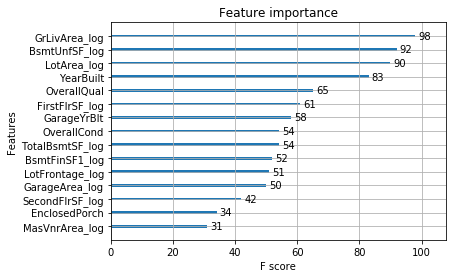

In [206]:
###################################
###Variable Importance from Xgboost
###################################
plot_importance(random_search_xgb.best_estimator_,max_num_features = 15)

num_occur_in_splits = random_search_xgb.best_estimator_.get_booster().get_score(importance_type = 'weight')
b = pd.DataFrame(num_occur_in_splits,index = [0]).transpose()
b.rename(columns = {0:'Num_times_in_split'},inplace = True)
b.sort_values('Num_times_in_split',ascending =False)



In [207]:
### which observations is the training score really bad on

In [231]:
bad_pred=error_track_xgb.copy()
bad_pred.head(20)

,actual,prediction,squ_error,LotFrontage_log,LotArea_log,OverallQual,OverallCond,YearBuilt,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,FirstFlrSF_log,SecondFlrSF_log,GrLivArea_log,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch,ThreeSsnPorch_zero,ScreenPorch_log,PoolArea_zero,MiscVal_zero,YrSold,MiscFeature_shed,YearRemodAdd_pre1950,Year_between_build_and_remod,LotFrontage_miss,GarageYrBlt_miss,GarageArea_miss,MasVnrArea_zero,BsmtFinSF1_zero,BsmtFinSF2_zero,SecondFlrSF_zero,BsmtUnfSF_zero,LowQualFinSF_zero,WoodDeckSF_zero,OpenPorchSF_zero,ScreenPorch_zero,EnclosedPorch_zero,Functional_Numeric,BsmtFinSF1_log_squ,ScreenPorch_log_squ,YearBuilt_squ,GarageYrBlt_squ,OpenPorchSF_log_squ,BsmtUnfSF_log_squ,GrLivArea_log_squ,OverallCond_squ,OverallQual_squ,LotArea_log_squ,GarageArea_log_squ,FirstFlrSF_log_squ,SecondFlrSF_log_squ,BsmtQual_Numeric,BsmtCond_Numeric,BsmtExposure_Numeric,HeatingQC_Numeric,GarageQual_Numeric,GarageCond_Numeric,KitchenQual_Numeric,FireplaceQu_Numeric,ExterQual_Numeric,ExterCond_Numeric,salet_CWD,salet_Con,salet_ConLD,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_Family,salec_Normal,salec_Partial,fence_Abnorml,fence_Family,fence_GdPrv,fence_GdWo,fence_MnPrv,pave_Family,pave_N,pave_P,pave_Y,garaf_Family,garaf_Fin,garaf_NA,garaf_RFn,garaf_Unf,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_IDOTRR,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,garat_Abnorml,garat_Attchd,garat_Basment,garat_BuiltIn,garat_CarPort,garat_Detchd,garat_Family,garat_NA,elec_FuseF,elec_SBrkr,cent_Family,cent_N,cent_Y,bsmtf1_Abnorml,bsmtf1_BLQ,bsmtf1_Family,bsmtf1_GLQ,bsmtf1_LwQ,bsmtf1_NA,bsmtf1_Rec,bsmtf1_Unf,lcon_Corner,lcon_CulDSac,lcon_FR2,lcon_Family,lcon_Inside,landc_Bnk,landc_Family,landc_HLS,landc_Low,landc_Lvl,roof_Family,roof_Gable,roof_Hip,bsmtf2_Abnorml,bsmtf2_BLQ,bsmtf2_Family,bsmtf2_GLQ,bsmtf2_LwQ,bsmtf2_NA,bsmtf2_Rec,bsmtf2_Unf,found_CBlock,found_PConc,found_Slab,vnr_BrkFace,vnr_None,vnr_Stone,ext2_BrkFace,ext2_CemntBd,ext2_HdBoard,ext2_MetalSd,ext2_Plywood,ext2_Stucco,ext2_VinylSd,ext2_Wd Sdng,ext2_Wd Shng,mosold_2,mosold_3,mosold_Abnorml,mosold_Family,ext1_BrkFace,ext1_CemntBd,ext1_HdBoard,ext1_MetalSd,ext1_Plywood,ext1_Stucco,ext1_VinylSd,ext1_Wd Sdng,style_1Story,style_2Story,style_Other,style_SLvl,zone_RH,zone_RL,zone_RM,lshape_Family,lshape_IR1,lshape_IR2,lshape_IR3,lshape_Reg,btype_2fmCon,btype_Abnorml,btype_Duplex,btype_Family,btype_Twnhs,btype_TwnhsE,residual
632,11.320554,11.827938,0.257439,4.454347,9.384378,7,5,1977,5.347108,6.712956,0.000000,6.336826,7.234898,7.252762,0.000000,7.252762,0,0,2,0,3,1,6,1,1977.0,2,6.300786,5.262690,0.000000,0,0,0.0,0,0,2009,0,0,0,False,False,False,0,0,1,1,0,0,1,0,0,0,0,45.063781,0.0,3908529,3908529.0,0.000000,40.155360,52.602563,25,49,88.066545,39.699902,52.602563,0.000000,3,3,0,3,3,3,3,3,3,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.507385
1324,11.898188,12.384704,0.236698,4.330733,9.209040,8,5,2006,6.061457,0.000000,0.000000,7.493317,7.493317,7.493317,0.000000,7.493317,0,0,2,0,2,1,7,1,2007.0,3,6.797940,0.000000,3.912023,0,0,0.0,0,0,2007,0,0,1,False,False,False,0,1,1,1,0,0,0,1,0,0,0,0.000000,0.0,4024036,4028049.0,15.303924,56.149803,56.149803,25,64,84.806409,46.211994,56.149803,0.000000,5,3,0,5,3,3,4,4,4,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0

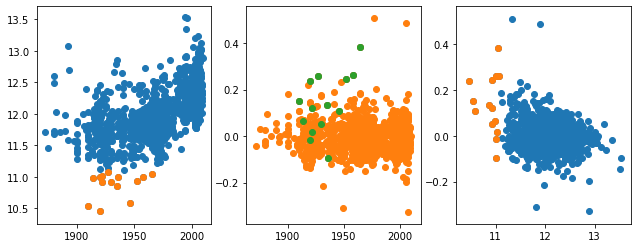

In [233]:
fig,axs = plt.subplots(1,3)

axs[0].scatter(bad_pred.YearBuilt, bad_pred.actual)
axs[0].scatter(bad_pred.loc[bad_pred.actual<11.1,'YearBuilt'], bad_pred.loc[b.actual<11.1,'actual'])
axs[1].scatter(bad_pred.loc[bad_pred.actual<11.1,'YearBuilt'], bad_pred.loc[b.actual<11.1,'residual'])

axs[1].scatter(bad_pred.YearBuilt, bad_pred.residual)
axs[1].scatter(bad_pred.loc[bad_pred.actual<11.1,'YearBuilt'], bad_pred.loc[b.actual<11.1,'residual'])

axs[2].scatter(bad_pred.actual,bad_pred.residual)
axs[2].scatter(bad_pred.loc[bad_pred.actual<11.1,'actual'], bad_pred.loc[b.actual<11.1,'residual'])
plt.subplots_adjust(right = 1.5)

In [234]:

somedata = bad_pred.loc[:,['actual','prediction','residual']]
otherdata= trn.loc[:,['Neighborhood','log_sale_price']]
alldat = somedata.join(otherdata, how = 'outer')

alldat.sort_values('residual', ascending = False).head(20)

,actual,prediction,residual,Neighborhood,log_sale_price
632,11.320554,11.827938,0.507385,NWAmes,11.320554
1324,11.898188,12.384704,0.486516,Somerst,11.898188
462,11.041048,11.421704,0.380656,Sawyer,11.041048
410,11.002100,11.264107,0.262007,Edwards,11.002100
1432,11.074421,11.334215,0.259795,OldTown,11.074421
812,10.932982,11.176689,0.243707,IDOTRR,10.932982
495,10.460242,10.697724,0.237482,IDOTRR,10.460242
658,11.487608,11.720694,0.233086,NAmes,11.487608
1383,11.626254,11.845321,0.219067,Sawyer,11.626254
972,11.507913,11.708731,0.200818,SawyerW,11.507913


In [235]:
c=b.sort_values('actual')
c.loc[:,['actual','residual','YearBuilt','Year_between_build_and_remod','OverallCond']].head(5)


,actual,residual,YearBuilt,Year_between_build_and_remod,OverallCond
495,10.460242,0.237482,1920,30,5
968,10.542706,0.152657,1910,40,6
533,10.578980,0.108593,1946,4,3
710,10.858999,0.133900,1935,68,6
1325,10.915088,0.122000,1922,28,4
